In [0]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing
import sklearn.neural_network
import sklearn.model_selection 


In [0]:
df = pd.read_csv('City.csv')
Y=df.iloc[:,0]
X= df.iloc[:,2:]


In [0]:
# Partimos los datos, la mitad para entrenamiento y la otra para test
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.5)


In [0]:
#buscamos el número de clases
K=len(Y.unique())
F1log= np.zeros(1)
F1_NR_1=np.zeros(K)


In [5]:
#Realizamos regresión logística
clf1= LogisticRegression(C=10**(-1), penalty='l1', solver='saga', tol=0.1)
clf1.fit(x_train, y_train)
y_pred1=clf1.predict(x_test)
F1log=(np.mean(f1_score(y_test, y_pred1, average=None)))
print (F1log)

0.6215422511167397


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

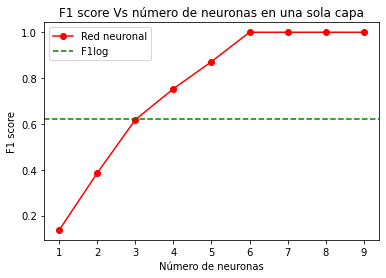

In [6]:
#Utilizamos redes neuronales con una sola capa oculta y 1 hasta k neuronas en ella
for nun in range(K):
  mlp = sklearn.neural_network.MLPClassifier(activation='logistic', 
                                           hidden_layer_sizes=(nun+1), 
                                           max_iter=1000)
  mlp.fit(x_train, y_train)
  mlp.fit(x_train, y_train)
  F1_NR_1[nun]=(sklearn.metrics.f1_score(y_test, mlp.predict(x_test), average='macro'))
fig, ax = plt.subplots()
ax.plot(np.arange(1,K+1), F1_NR_1, 'ro-',label= 'Red neuronal')
ax.set_title('F1 score Vs número de neuronas en una sola capa')
ax.set_xlabel('Número de neuronas')
ax.set_ylabel('F1 score')
ax.axhline(y= F1log, xmin=0, xmax=9,color='g', linestyle='--', label= 'F1log')
ax.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

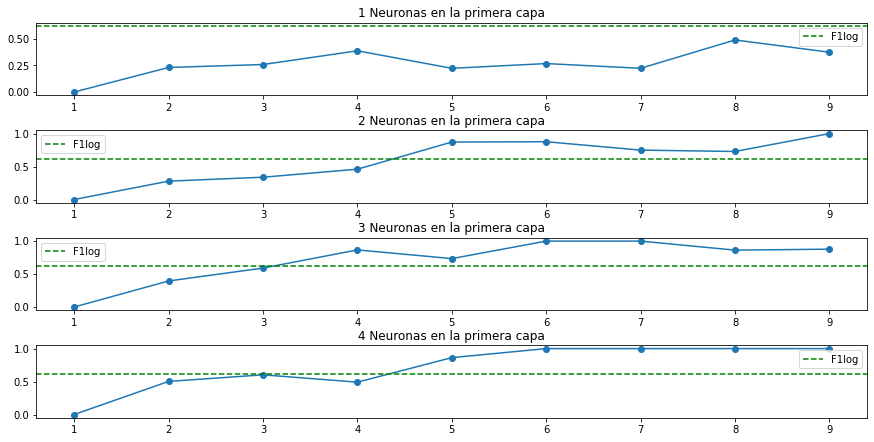

In [7]:
fig, axs = plt.subplots(int(K/2), figsize=(12,6))
#Nuestro F1 ahora tendrá dos ejes
F1_NR_2=np.zeros((int(K/2), K))
#Utilizamos redes neuronales con 2 capas ocultas: con 1:k/2, 2: 2 a k neuronas 
for nun in range(int(K/2)):
  for s in range (1, K):
    mlp = sklearn.neural_network.MLPClassifier(activation='logistic', 
                                           hidden_layer_sizes=(nun+1,s+1), 
                                           max_iter=1500)
    mlp.fit(x_train, y_train)
    F1_NR_2[nun][s]=(sklearn.metrics.f1_score(y_test, mlp.predict(x_test), average='macro'))
  axs[nun].plot(np.arange(1,K+1),F1_NR_2[nun],'o-')
  axs[nun].set_title(str(nun+1)+' Neuronas en la primera capa')
  axs[nun].axhline(y= F1log, xmin=0, xmax=9,color='g', linestyle='--', label= 'F1log')
  axs[nun].legend()
fig.tight_layout(pad=0.2)


**¿Mejoró la predicción?**

Sí, efectivamente la red obtuvo mejor predicción en menor número de neuronas en la segunda capa cuando aumentaba el número de neuronas en la primera. En este ejemplo en particular la complejidad aumentó el F1 score.